<a href="https://colab.research.google.com/github/MJanbandhu/Machine-Learning/blob/main/Titanic_feature_Engineering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use case: Survival data for passengers of the Titanic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing important libraries

In [ ]:
 pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9d15a8ff9d2e450ad40373ba6ff71ebe958038b5e84c85ce1d6391c45ac10321
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML (1)/Feature Engineering/train.csv")  # loading dataset

# Basic Checks '

In [ ]:
data.head()  # showing first 5 rows and columns

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [ ]:
data.shape

(418, 12)

In [ ]:
# This all columns are not important that's why we are going to drop mentioned columns

data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
data.head()   # showing last 5 rows and columns

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [ ]:
data.shape  # it showing

(891, 8)

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
data.info()   # it showing information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
data.describe()   # it showing statistics informations

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
Continuous_cols = data[['Age','Fare']] # Continuous variables

Discrete_cols = data[['Pclass','SibSp','Parch','Survived']] # Discrete variables

Categorical_cols = data[['Sex','Embarked']] # Categorical variables

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
data.Age.fillna(data.Age.median(),inplace=True)

In [ ]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
data.Embarked.fillna('S',inplace=True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# EDA

In [ ]:
profile=ProfileReport(data,title="EDA") # explorative=False

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

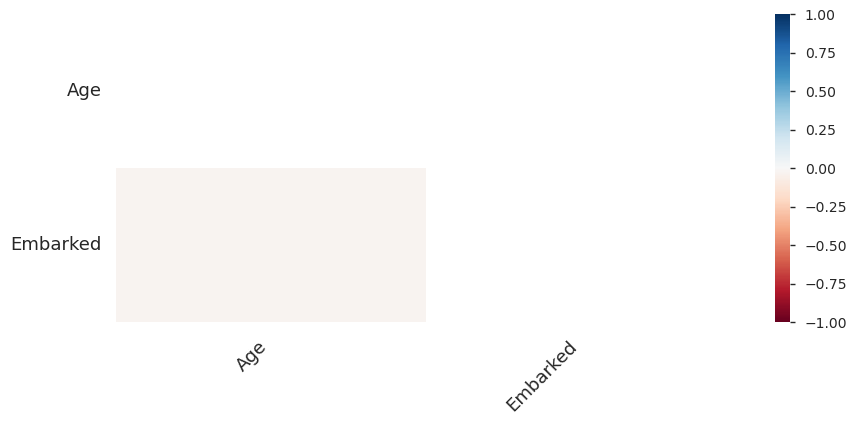

In [ ]:
profile

# Correlation Matrix

<Axes: >

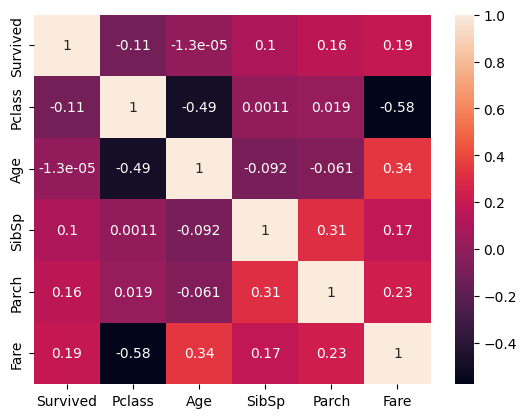

In [ ]:
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(),annot=True)

- A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.
- The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.


# Data  PreProcessing

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.
- It is the first and crucial step while creating a machine learning model.
- When creating a machine learning project, it is not always a case that we come across the clean and formatted data.

In [ ]:
Continuous_cols = data[['Age','Fare']] # Continuous variables

Discrete_cols = data[['Pclass','SibSp','Parch','Survived']] # Discrete variables

Categorical_cols = data[['Sex','Embarked']] # Categorical variables

# Function transformer :

- we can use FunctionTrasformer to use our own custom function for transformation.
- So we will use this custom function whe we are defining the pipeline.
- We can define our funtion transformer whenever we need that in our pipeline.

In [ ]:
divby_100_col = ['Age']

In [ ]:
def divide_by_100(x):
    return (x/100)

In [ ]:
custom = FunctionTransformer(divide_by_100)

In [ ]:
passthrough = ["Pclass", "SibSp", "Parch", "Survived"]

In [ ]:
def same(x):
    return x

In [ ]:
no_trans = FunctionTransformer(same)

# Using Modified Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
class ModifiedLabelEncoder(LabelEncoder):

    def fit_transform(self, y, *args, **kwargs):
       return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
       return super().transform(y).reshape(-1, 1)

In [ ]:
# We are defining here each columns that which scaling techniques are used for which columns :


OHE_columns=['Sex']
standard_scaler_col=['Fare']
divby_100_col=['Age']
passthrough_col=["Pclass", "SibSp", "Parch", "Survived"]
label_encoder_col=['Embarked']


# Steps of preprocesing for features:
- **LabelEncoder for**    :  'Embarked'
- **One hot encoder for** :  'Sex'
- **Standard scaler for** :  'Fare'
- **Function transformer**:  'Age'                     

# Column Transformer

- You use the ColumnTransformer to transform each column set separately and then you can use the pipeline for multiple transformations of the same columns.
- Column Transformer is a scikit-learn class used to create and apply separate transformers for numerical and categorical data. - To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation.

# Defining the preprocessor :

In [ ]:
preprocessor = ColumnTransformer([('One_Hot_columns', OneHotEncoder(), OHE_columns),
                                ('standard_scaler', StandardScaler(), standard_scaler_col),
                                ('custom', custom, divby_100_col),
                                ('Label_encoder' ,ModifiedLabelEncoder(), ['Embarked']),
                                ('Pass_through' ,no_trans, passthrough_col)])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('One_Hot_columns', OneHotEncoder(), ['Sex']),
                                ('standard_scaler', StandardScaler(), ['Fare']),
                                ('custom',
                                 FunctionTransformer(func=<function divide_by_100 at 0x7db1f3212e60>),
                                 ['Age']),
                                ('Label_encoder', ModifiedLabelEncoder(),
                                 ['Embarked']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x7db1f369b1c0>),
                                 ['Pclass', 'SibSp', 'Parch', 'Survived'])])

In [ ]:
preprocessed_data = preprocessor.fit_transform(data)

In [ ]:
preprocessed_data.shape

(891, 9)

In [ ]:
data1 = pd.DataFrame(preprocessed_data,columns=['Sex_Female', 'Sex_Male', 'Age', 'Fare', 'Embarked', 'Pclass',
       'SibSp','Parch','Survived'])

In [ ]:
data1

Sex_Female  Sex_Male       Age  Fare  Embarked  Pclass  SibSp  Parch  \
0           0.0       1.0 -0.502445  0.22       2.0     3.0    1.0    0.0   
1           1.0       0.0  0.786845  0.38       0.0     1.0    1.0    0.0   
2           1.0       0.0 -0.488854  0.26       2.0     3.0    0.0    0.0   
3           1.0       0.0  0.420730  0.35       2.0     1.0    1.0    0.0   
4           0.0       1.0 -0.486337  0.35       2.0     3.0    0.0    0.0   
..          ...       ...       ...   ...       ...     ...    ...    ...   
886         0.0       1.0 -0.386671  0.27       2.0     2.0    0.0    0.0   
887         1.0       0.0 -0.044381  0.19       2.0     1.0    0.0    0.0   
888         1.0       0.0 -0.176263  0.28       2.0     3.0    1.0    2.0   
889         0.0       1.0 -0.044381  0.26       0.0     1.0    0.0    0.0   
890         0.0       1.0 -0.492378  0.32       1.0     3.0    0.0    0.0   

     Survived  
0         0.0  
1         1.0  
2         1.0  
3         1.0  
4         0.0  
..        ...  
886       0.0  
887       1.0  
888       0.0  
889       1.0  
890       0.0  

[891 rows x 9 columns]

In [ ]:
## We can end here   If it is required to take this preprocessed pipeline file to any other python sheet , it can be saved as a
# pickle file[binary file with the values 0 and 1] and taken to the required python file.

# Creating Pickle file


In [ ]:
file=open("Titanic.pkl","wb")

In [ ]:
pickle.dump(preprocessor,file)

In [ ]:
file.close()

In [ ]:
file=open("Titanic.pkl","rb")

In [ ]:
pre=pickle.load(file)

In [ ]:
pre

ColumnTransformer(transformers=[('One_Hot_columns', OneHotEncoder(), ['Sex']),
                                ('standard_scaler', StandardScaler(), ['Fare']),
                                ('custom',
                                 FunctionTransformer(func=<function divide_by_100 at 0x7db1f3212e60>),
                                 ['Age']),
                                ('Label_encoder', ModifiedLabelEncoder(),
                                 ['Embarked']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x7db1f369b1c0>),
                                 ['Pclass', 'SibSp', 'Parch', 'Survived'])])

In [ ]:
processed_data = pre.fit_transform(data)

In [ ]:
data2 = pd.DataFrame(processed_data,columns=['Sex_Female', 'Sex_Male', 'Age', 'Fare', 'Embarked', 'Pclass',
       'SibSp','Parch','Survived'])
data2

Sex_Female  Sex_Male       Age  Fare  Embarked  Pclass  SibSp  Parch  \
0           0.0       1.0 -0.502445  0.22       2.0     3.0    1.0    0.0   
1           1.0       0.0  0.786845  0.38       0.0     1.0    1.0    0.0   
2           1.0       0.0 -0.488854  0.26       2.0     3.0    0.0    0.0   
3           1.0       0.0  0.420730  0.35       2.0     1.0    1.0    0.0   
4           0.0       1.0 -0.486337  0.35       2.0     3.0    0.0    0.0   
..          ...       ...       ...   ...       ...     ...    ...    ...   
886         0.0       1.0 -0.386671  0.27       2.0     2.0    0.0    0.0   
887         1.0       0.0 -0.044381  0.19       2.0     1.0    0.0    0.0   
888         1.0       0.0 -0.176263  0.28       2.0     3.0    1.0    2.0   
889         0.0       1.0 -0.044381  0.26       0.0     1.0    0.0    0.0   
890         0.0       1.0 -0.492378  0.32       1.0     3.0    0.0    0.0   

     Survived  
0         0.0  
1         1.0  
2         1.0  
3         1.0  
4         0.0  
..        ...  
886       0.0  
887       1.0  
888       0.0  
889       1.0  
890       0.0  

[891 rows x 9 columns]